In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from sklearn import preprocessing
import re
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
%matplotlib inline
sns.set(color_codes=True)

trainFilename = "spotify_train.csv"
testFilename = "spotify_test.csv"

train_dataframe_def = pd.read_csv(trainFilename)

test_dataframe_def = pd.read_csv(testFilename)

In [2]:
train_dataframe_def.count()

id                      44776
artist_id               44776
artist                  44776
name                    44776
popularity              44776
release_date            44776
duration_ms             44776
explicit                44776
danceability            44776
energy                  44776
key                     44776
loudness                44776
mode                    44776
speechiness             44776
acousticness            44776
instrumentalness        44776
liveness                44776
valence                 44776
tempo                   44776
artist_genres           44776
artist_followers        44775
url                     44776
playlist_id             44776
playlist_description    30974
playlist_name           44755
playlist_url            44776
query                   44776
dtype: int64

In [3]:
train_dataframe_def.shape

(44776, 27)

In [4]:
test_dataframe_def.shape

(8893, 27)

In [5]:
# DELETE COLS WHICH I THINK ARE NOT USEFUL FOR US
train_dataframe_def = train_dataframe_def.drop(['id','artist_id','duration_ms','explicit','artist_followers','url','playlist_id','playlist_description','playlist_name','playlist_url','query'], axis=1)
test_dataframe_def = test_dataframe_def.drop(['id','artist_id','duration_ms','explicit','artist_followers','url','playlist_id','playlist_description','playlist_name','playlist_url','query','key','mode','release_date'], axis=1)

In [6]:
# DELETE ROWS WITH EMPTY CELLS
train_dataframe_def.dropna(axis=0, inplace=True)

In [7]:
duplicate_rows_df = train_dataframe_def[train_dataframe_def.duplicated()]
print("Number of duplicate rows in train: ", duplicate_rows_df.shape)

train_dataframe_def = train_dataframe_def.drop_duplicates()

Number of duplicate rows in train:  (22, 16)


In [8]:
train_dataframe_def.shape

(44754, 16)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,0.203172,0.119830,0.006560,0.189956,-0.010425,0.041428,-0.153016,-0.236036,-0.027250,0.115960,0.006035
danceability,0.203172,1.000000,0.309643,0.027571,0.417492,-0.048890,0.261769,-0.346891,-0.336633,-0.058274,0.554845,-0.000303
energy,0.119830,0.309643,1.000000,0.039618,0.838371,-0.058156,0.162470,-0.810517,-0.368158,0.213664,0.392116,0.299185
key,0.006560,0.027571,0.039618,1.000000,0.027423,-0.168306,0.031175,-0.035982,-0.008536,-0.003291,0.028676,-0.001543
loudness,0.189956,0.417492,0.838371,0.027423,1.000000,-0.039163,0.164957,-0.724890,-0.511646,0.155375,0.365598,0.263995
mode,-0.010425,-0.048890,-0.058156,-0.168306,-0.039163,1.000000,-0.082125,0.054774,-0.038047,0.014101,0.025909,-0.008273
speechiness,0.041428,0.261769,0.162470,0.031175,0.164957,-0.082125,1.000000,-0.139661,-0.173468,0.078172,0.119252,0.065232
acousticness,-0.153016,-0.346891,-0.810517,-0.035982,-0.724890,0.054774,-0.139661,1.000000,0.362498,-0.136704,-0.301414,-0.259597
instrumentalness,-0.236036,-0.336633,-0.368158,-0.008536,-0.511646,-0.038047,-0.173468,0.362498,1.000000,-0.105884,-0.357245,-0.063348
liveness,-0.027250,-0.058274,0.213664,-0.003291,0.155375,0.014101,0.078172,-0.136704,-0.105884,1.000000,0.048625,0.041397


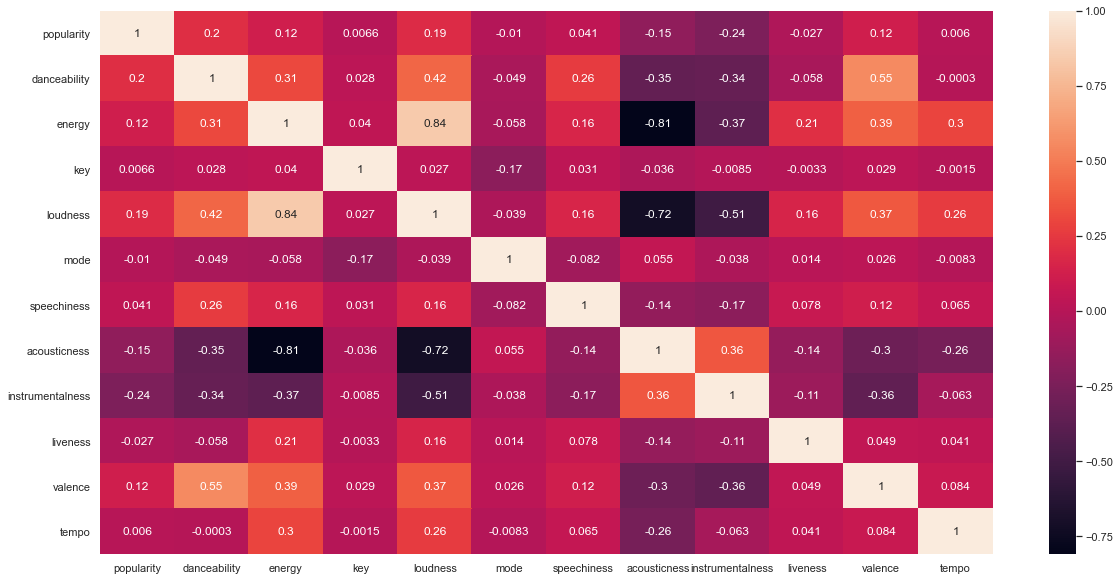

In [9]:
# MAKE CORRELATION MATRIX
plt.figure(figsize=(20,10))
c= train_dataframe_def.corr()
sns.heatmap(c,annot=True)
c

In [10]:
# REMOVE COLS WITH IRRELEVANT IMPACT
train_dataframe_def = train_dataframe_def.drop(['key','mode'], axis=1)
train_dataframe_def.shape

(44754, 14)

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,0.203172,0.119830,0.189956,0.041428,-0.153016,-0.236036,-0.027250,0.115960,0.006035
danceability,0.203172,1.000000,0.309643,0.417492,0.261769,-0.346891,-0.336633,-0.058274,0.554845,-0.000303
energy,0.119830,0.309643,1.000000,0.838371,0.162470,-0.810517,-0.368158,0.213664,0.392116,0.299185
loudness,0.189956,0.417492,0.838371,1.000000,0.164957,-0.724890,-0.511646,0.155375,0.365598,0.263995
speechiness,0.041428,0.261769,0.162470,0.164957,1.000000,-0.139661,-0.173468,0.078172,0.119252,0.065232
acousticness,-0.153016,-0.346891,-0.810517,-0.724890,-0.139661,1.000000,0.362498,-0.136704,-0.301414,-0.259597
instrumentalness,-0.236036,-0.336633,-0.368158,-0.511646,-0.173468,0.362498,1.000000,-0.105884,-0.357245,-0.063348
liveness,-0.027250,-0.058274,0.213664,0.155375,0.078172,-0.136704,-0.105884,1.000000,0.048625,0.041397
valence,0.115960,0.554845,0.392116,0.365598,0.119252,-0.301414,-0.357245,0.048625,1.000000,0.083928
tempo,0.006035,-0.000303,0.299185,0.263995,0.065232,-0.259597,-0.063348,0.041397,0.083928,1.000000


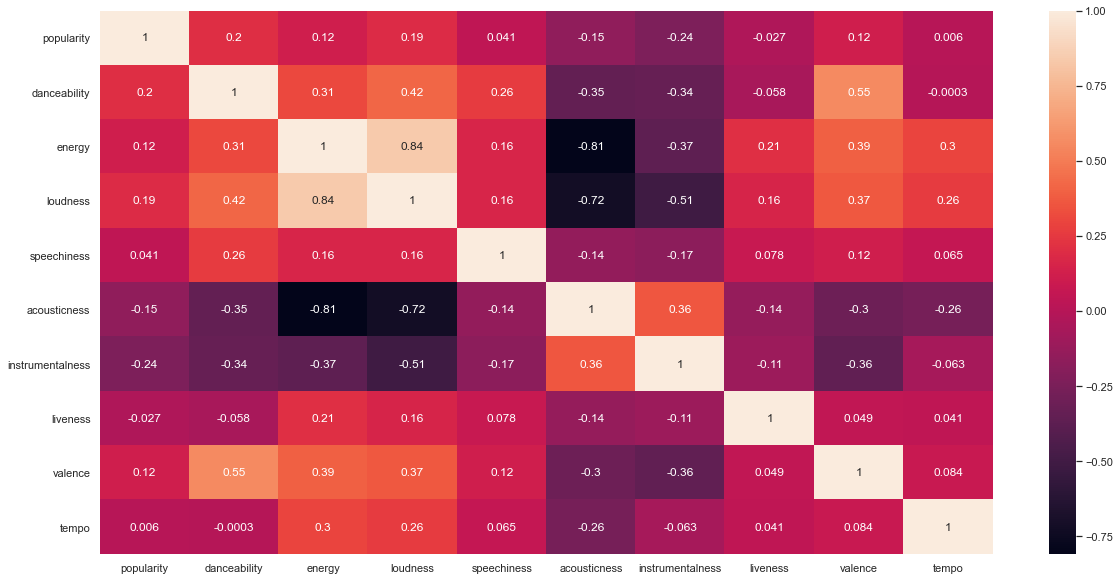

In [11]:
plt.figure(figsize=(20,10))
c2 = train_dataframe_def.corr()
sns.heatmap(c2,annot=True)
c2

In [12]:
train_dataframe_def.shape

(44754, 14)

In [13]:
# REMOVE DUPLICATES BASED ON ARTIST NAME AND SONG NAME - TRAIN
train_dataframe_def = train_dataframe_def.sort_values(by=['popularity'])

train_dataframe_def = train_dataframe_def.drop_duplicates(subset=['artist','name'], keep='last')
train_dataframe_def = train_dataframe_def.drop(['artist','name'], axis=1)
train_dataframe_def.shape

(41998, 12)

In [14]:
test_dataframe_def = test_dataframe_def.drop(['artist','name'], axis=1)

In [15]:
train_dataframe_def.head()

,popularity,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_genres
40222,0,2019-03-09,0.724,0.877,-3.672,0.0893,0.000722,0.910000,0.0511,0.596,87.000,"['bass house', 'uk dnb']"
42099,0,1994-01-01,0.354,0.190,-20.670,0.0421,0.948000,0.665000,0.0696,0.283,157.349,['classical era']
14555,0,2013-03-12,0.619,0.659,-6.343,0.0291,0.002130,0.000004,0.2850,0.816,96.002,"['anthem worship', 'ccm', 'christian indie', '..."
28931,0,2011-02-21,0.638,0.184,-15.835,0.0351,0.377000,0.000000,0.1010,0.664,119.154,"['adult standards', 'brill building pop', 'mot..."
6226,0,2017-11-17,0.573,0.810,-5.088,0.3740,0.228000,0.000000,0.4740,0.463,119.978,"['hip hop', 'pop', 'rap']"


In [16]:
# CHANGE 'release_date' TO YEAR ONLY FORMAT
train_dataframe_def['release_date'] = train_dataframe_def['release_date'].str[:4]

train_dataframe_def.head()

,popularity,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_genres
40222,0,2019,0.724,0.877,-3.672,0.0893,0.000722,0.910000,0.0511,0.596,87.000,"['bass house', 'uk dnb']"
42099,0,1994,0.354,0.190,-20.670,0.0421,0.948000,0.665000,0.0696,0.283,157.349,['classical era']
14555,0,2013,0.619,0.659,-6.343,0.0291,0.002130,0.000004,0.2850,0.816,96.002,"['anthem worship', 'ccm', 'christian indie', '..."
28931,0,2011,0.638,0.184,-15.835,0.0351,0.377000,0.000000,0.1010,0.664,119.154,"['adult standards', 'brill building pop', 'mot..."
6226,0,2017,0.573,0.810,-5.088,0.3740,0.228000,0.000000,0.4740,0.463,119.978,"['hip hop', 'pop', 'rap']"


In [17]:
# LABEL ENCODE 'release_date'
train_dataframe_def = train_dataframe_def.sort_values(by=['release_date'])
train_dataframe_def['release_date'].unique()

array(['1900', '1913', '1928', '1933', '1938', '1947', '1948', '1949',
       '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958',
       '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype=object)

In [18]:
label_encoder = preprocessing.LabelEncoder()
train_dataframe_def['release_date'] = label_encoder.fit_transform(train_dataframe_def['release_date'])
train_dataframe_def['release_date'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78])

In [19]:
train_dataframe_def.head()

,popularity,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_genres
22572,32,0,0.467,0.868,-5.510,0.1240,0.03530,0.000000,0.077,0.835,200.748,"['classic czech pop', 'czech folk', 'czech pop..."
20872,0,0,0.417,0.124,-21.512,0.0392,0.98500,0.851000,0.230,0.329,122.040,"['classical piano', 'german classical piano']"
40623,32,0,0.416,0.664,-4.873,0.0420,0.00246,0.000004,0.545,0.216,145.978,"['horror punk', 'screamo']"
15990,56,1,0.328,0.221,-9.700,0.0299,0.94000,0.001350,0.301,0.369,77.147,"['adult standards', 'big band', 'jazz trumpet'..."
17170,49,2,0.626,0.744,-9.189,0.0662,0.84700,0.892000,0.145,0.259,113.117,"['adult standards', 'big band', 'jazz', 'jazz ..."


In [20]:
train_dataframe_def.tail()

,popularity,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_genres
15015,41,78,0.835,0.729,-5.674,0.0936,0.1140,0.00276,0.319,0.470,100.008,['spanish hip hop']
22862,41,78,0.722,0.617,-10.053,0.0400,0.3760,0.42900,0.355,0.167,122.033,"['bass house', 'deep groove house', 'edm', 'el..."
36500,41,78,0.598,0.893,-5.677,0.0445,0.0103,0.90100,0.154,0.310,127.965,"['pop dance', 'progressive house', 'progressiv..."
24245,62,78,0.884,0.588,-10.178,0.3140,0.1130,0.00000,0.122,0.670,141.908,"['pop urbaine', 'rap francais']"
29142,100,78,0.591,0.764,-5.484,0.0483,0.0383,0.00000,0.103,0.478,169.928,['australian hip hop']


In [21]:
# DROP 'release_date' IRRELEVANT FOR US
train_dataframe_def = train_dataframe_def.drop(['release_date'], axis=1)

In [22]:
train_dataframe_def.shape

(41998, 11)

<AxesSubplot:xlabel='liveness'>

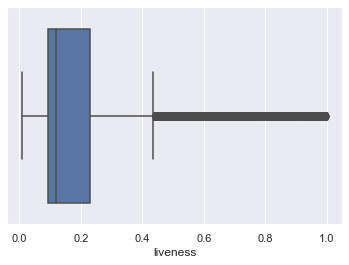

In [23]:
# CHANGE ALL OUTLIERS FOR MEDIAN IN TRAIN
sns.boxplot(x=train_dataframe_def['liveness'])

In [24]:
outlier_tr_df = train_dataframe_def.copy()
outlier_tr_df = outlier_tr_df.drop(['artist_genres','loudness'], axis=1)
# outlier_tr_df.describe()

In [25]:
outlier_tr_df.head()

,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
22572,32,0.467,0.868,0.1240,0.03530,0.000000,0.077,0.835,200.748
20872,0,0.417,0.124,0.0392,0.98500,0.851000,0.230,0.329,122.040
40623,32,0.416,0.664,0.0420,0.00246,0.000004,0.545,0.216,145.978
15990,56,0.328,0.221,0.0299,0.94000,0.001350,0.301,0.369,77.147
17170,49,0.626,0.744,0.0662,0.84700,0.892000,0.145,0.259,113.117


In [26]:
for column in outlier_tr_df:
    my_median = outlier_tr_df[column].median()

    q1 = outlier_tr_df[column].quantile(0.25)
    q3 = outlier_tr_df[column].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr

    outlier_tr_df[column] = np.where((outlier_tr_df[column] < fence_low) | (outlier_tr_df[column] > fence_high), my_median ,outlier_tr_df[column])

In [27]:
outlier_tr_df.head()

,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
22572,32.0,0.467,0.868,0.1240,0.03530,0.000000,0.077,0.835,200.748
20872,0.0,0.417,0.124,0.0392,0.98500,0.000306,0.230,0.329,122.040
40623,32.0,0.416,0.664,0.0420,0.00246,0.000004,0.121,0.216,145.978
15990,56.0,0.328,0.221,0.0299,0.94000,0.001350,0.301,0.369,77.147
17170,49.0,0.626,0.744,0.0662,0.84700,0.000306,0.145,0.259,113.117


<AxesSubplot:xlabel='liveness'>

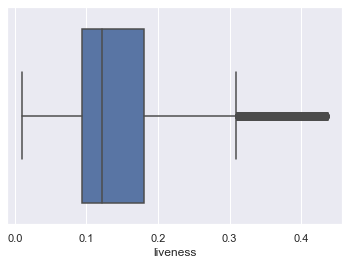

In [28]:
sns.boxplot(x=outlier_tr_df['liveness'])

In [29]:
train_dataframe_def.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_genres
22572,32,0.467,0.868,-5.510,0.1240,0.03530,0.000000,0.077,0.835,200.748,"['classic czech pop', 'czech folk', 'czech pop..."
20872,0,0.417,0.124,-21.512,0.0392,0.98500,0.851000,0.230,0.329,122.040,"['classical piano', 'german classical piano']"
40623,32,0.416,0.664,-4.873,0.0420,0.00246,0.000004,0.545,0.216,145.978,"['horror punk', 'screamo']"
15990,56,0.328,0.221,-9.700,0.0299,0.94000,0.001350,0.301,0.369,77.147,"['adult standards', 'big band', 'jazz trumpet'..."
17170,49,0.626,0.744,-9.189,0.0662,0.84700,0.892000,0.145,0.259,113.117,"['adult standards', 'big band', 'jazz', 'jazz ..."


In [30]:
test_dataframe_def.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_genres
0,66,0.783,0.789,-3.899,0.0797,0.135000,0.330000,0.2130,0.853,128.019,['bass house']
1,2,0.413,0.566,-9.404,0.0965,0.035900,0.670000,0.0834,0.151,174.005,['russian dnb']
2,46,0.634,0.655,-7.404,0.0286,0.003490,0.000031,0.3020,0.580,130.013,"['bubblegrunge', 'chicago indie', 'indie pop',..."
3,58,0.331,0.961,-4.627,0.0663,0.000146,0.000000,0.3220,0.882,168.355,"['brighton indie', 'modern rock', 'rock']"
4,55,0.631,0.707,-4.601,0.1470,0.007100,0.000006,0.3390,0.321,93.007,"['french hip hop', 'old school rap francais', ..."


In [31]:
# COPIED DATAFRAME FOR VARIABLE NAME CONSISTENCY WITH TRAIN DATAS :)
outlier_tt_df = test_dataframe_def.copy()
outlier_tt_df = outlier_tt_df.drop(['artist_genres','loudness'], axis=1)

In [32]:
all_genres = ["electro", "pop", "rock", "hip hop", "country", "rap", "dubstep", "metal", "folk", "blues", "indie", "classic", "soul", "house", "jazz"]

# MAKE NEW COLS FROM GENRES - TRAIN
train_dataframe_copy = train_dataframe_def.copy()

main_found = []

def get_genres():
    for i in range(len(train_dataframe_def)):
#         print(train_dataframe_def.iloc[i, 10])
        found_arr = []
        full_string = train_dataframe_def.iloc[i, 10]
        arr = re.findall('\'([^\']*)\'', full_string)

        for j in range(len(arr)) :
            for k in range(len(all_genres)) :
                if (arr[j].find(all_genres[k]) != -1):
                    if all_genres[k] not in found_arr:
                        found_arr.append(all_genres[k])
                               
        main_found.append(found_arr)

get_genres()

In [33]:
test_dataframe_def.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_genres
0,66,0.783,0.789,-3.899,0.0797,0.135000,0.330000,0.2130,0.853,128.019,['bass house']
1,2,0.413,0.566,-9.404,0.0965,0.035900,0.670000,0.0834,0.151,174.005,['russian dnb']
2,46,0.634,0.655,-7.404,0.0286,0.003490,0.000031,0.3020,0.580,130.013,"['bubblegrunge', 'chicago indie', 'indie pop',..."
3,58,0.331,0.961,-4.627,0.0663,0.000146,0.000000,0.3220,0.882,168.355,"['brighton indie', 'modern rock', 'rock']"
4,55,0.631,0.707,-4.601,0.1470,0.007100,0.000006,0.3390,0.321,93.007,"['french hip hop', 'old school rap francais', ..."


In [34]:
# MAKE NEW COLS FROM GENRES - TEST
test_dataframe_copy = test_dataframe_def.copy()

main_found_test = []

def get_genres_test():
    for i in range(len(test_dataframe_def)):
        found_arr = []
        full_string = test_dataframe_def.iloc[i, 10]
        arr = re.findall('\'([^\']*)\'', full_string)

        for j in range(len(arr)) :
            for k in range(len(all_genres)) :
                if (arr[j].find(all_genres[k]) != -1):
                    if all_genres[k] not in found_arr:
                        found_arr.append(all_genres[k])
                               
        main_found_test.append(found_arr)

get_genres_test()

In [35]:
train_dataframe_copy['our_arr'] = main_found
test_dataframe_copy['our_arr'] = main_found_test

In [36]:
# SPLIT GENRE ARRAY INTO SEPARATE COLS - TRAIN AND TEST
mlb = MultiLabelBinarizer()
genre_outputs = pd.DataFrame(mlb.fit_transform(train_dataframe_copy['our_arr']),columns=mlb.classes_, index=train_dataframe_copy.index)

mlb2 = MultiLabelBinarizer()
genre_outputs_test = pd.DataFrame(mlb2.fit_transform(test_dataframe_copy['our_arr']),columns=mlb2.classes_, index=test_dataframe_copy.index)

In [37]:
train_dataframe_copy = train_dataframe_copy.join(genre_outputs)
test_dataframe_copy = test_dataframe_copy.join(genre_outputs_test)


# COMBINE SONG CHARACTERISTICS, OUTLIERS DATAFRAME(train) AND OUTPUT COLUMN IN ONE DATAFRAME
outlier_tr_df = outlier_tr_df.join(genre_outputs)
outlier_tr_df = outlier_tr_df.join(train_dataframe_copy['loudness'])
outlier_tt_df = outlier_tt_df.join(genre_outputs_test)
outlier_tt_df = outlier_tt_df.join(test_dataframe_copy['loudness'])

In [38]:
# genre_outputs.to_csv("genre_outputs.csv",index=False)
outlier_tr_df.to_csv("outlier_tr_df.csv",index=False)
outlier_tt_df.to_csv("outlier_tt_df.csv",index=False)


# NORMALISATION - TRAIN AND TEST
sc = StandardScaler()
outlier_tr_df = pd.DataFrame(sc.fit_transform(outlier_tr_df), columns=outlier_tr_df.columns)
outlier_tt_df = pd.DataFrame(sc.transform(outlier_tt_df), columns=outlier_tt_df.columns)


# SPLTTING OUTPUT AND INPUT DATA
X_train = outlier_tr_df.copy()
X_train = X_train.drop(['loudness'], axis=1)
y_train = outlier_tr_df["loudness"]

X_train.to_csv("X_train.csv",index=False)
y_train.to_csv("y_train.csv",index=False)


X_test = outlier_tt_df.copy()
X_test = X_test.drop(['loudness'], axis=1)
y_test = outlier_tt_df["loudness"]

X_test.to_csv("X_test.csv",index=False)
y_test.to_csv("y_test.csv",index=False)

In [39]:
# MAKE DATASET SMALLER SO IT RUNS FASTER :)
from sklearn.model_selection import train_test_split
X_train1, X_train, y_train1, y_train = train_test_split(X_train, y_train, test_size = 0.25)

In [40]:
# CROSS VALIDATION
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
result_cross_val = cross_validate(SVR(), X_train, y_train, cv=3, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print("R^2 cross validation:")
print(result_cross_val['train_r2'])

print("mse cross validation:")
print(result_cross_val['test_neg_mean_squared_error'])

R^2 cross validation:
[0.87541351 0.88044761 0.87992738]
mse cross validation:
[-0.15735744 -0.14885511 -0.15759272]


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

Best found parameters:
{'C': 20, 'gamma': 0.01, 'kernel': 'rbf'}



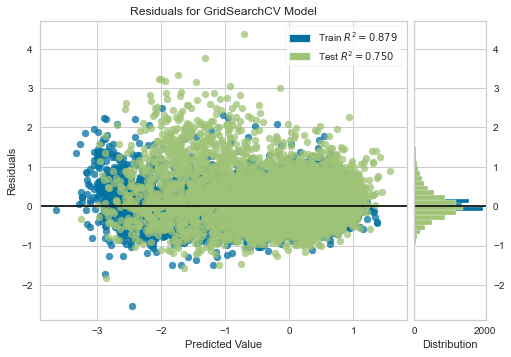

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [41]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from yellowbrick.regressor import ResidualsPlot

parameters = {'kernel':['rbf'], "gamma": [0.1,0.01,0.001], 'C':[5, 10, 20, 30]}
my_SVR = SVR(verbose = True)
clf = GridSearchCV(my_SVR, parameters)
visualizer = ResidualsPlot(clf)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
test_predict_SVR = visualizer.predict(X_test)
r2_SVR = visualizer.score(X_test, y_test)  # Evaluate the model on the test data

print()
print()
print("Best found parameters:")
print(visualizer.best_params_)
print()

visualizer.show()                 # Finalize and render the figure

In [42]:
for mean, params in zip(visualizer.cv_results_['mean_test_score'], visualizer.cv_results_['params']):
    print("mean: %f, params %r" % (mean, params))

mean: 0.831824, params {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
mean: 0.850417, params {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}
mean: 0.806800, params {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}
mean: 0.822884, params {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
mean: 0.853749, params {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
mean: 0.817607, params {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
mean: 0.809491, params {'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}
mean: 0.854887, params {'C': 20, 'gamma': 0.01, 'kernel': 'rbf'}
mean: 0.825673, params {'C': 20, 'gamma': 0.001, 'kernel': 'rbf'}
mean: 0.799316, params {'C': 30, 'gamma': 0.1, 'kernel': 'rbf'}
mean: 0.854834, params {'C': 30, 'gamma': 0.01, 'kernel': 'rbf'}
mean: 0.829997, params {'C': 30, 'gamma': 0.001, 'kernel': 'rbf'}


In [43]:
from sklearn.metrics import mean_squared_error
# r2
print("R^2 SVR:", r2_SVR)
# mean squared error
mse_SVR = mean_squared_error(y_test, test_predict_SVR)
print("mse SVR:", mse_SVR)

R^2 SVR: 0.7498599990925517
mse SVR: 0.2673022442809561


In [44]:
# BAGGING REGRESSION
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
reg_random_forrest = RandomForestRegressor(n_estimators=100, random_state=42, verbose=True)
reg_random_forrest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.3s finished


RandomForestRegressor(random_state=42, verbose=True)

In [45]:
# TEST MODEL AFTER TRAINING
test_predict_random_forrest = reg_random_forrest.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [46]:
# r2
from sklearn.metrics import mean_squared_error, r2_score
r2_reg_random_forrest = r2_score(y_test, test_predict_random_forrest)
# print(r2_reg_random_forrest)
print("R^2 random forest:", r2_reg_random_forrest)

R^2 random forest: 0.8728419374222824


In [47]:
# mean squared error
mse_reg_random_forrest = mean_squared_error(y_test, test_predict_random_forrest)
# print(mse_reg_random_forrest)
print("mse random forest:", mse_reg_random_forrest)

mse random forest: 0.13588244735802296


In [48]:
# BOOSTING REGRESSION
from sklearn.ensemble import AdaBoostRegressor
reg_ada = AdaBoostRegressor(n_estimators=100, random_state=42)
reg_ada.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [49]:
# TEST MODEL AFTER TRAINING
test_predict_ada = reg_ada.predict(X_test)

In [50]:
# r2
r2_reg_ada = r2_score(y_test, test_predict_ada)
# print(r2_reg_ada)
print("R^2 ada:", r2_reg_ada)

R^2 ada: 0.8026232325319937


In [51]:
# mean squared error
mse_reg_ada = mean_squared_error(y_test, test_predict_ada)
# print(mse_reg_ada)
print("mse ada:", mse_reg_ada)

mse ada: 0.21091889630495111
